In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
Hasta_olan = data[data.Outcome == 1]
Hasta_olmayan = data[data.Outcome == 0]

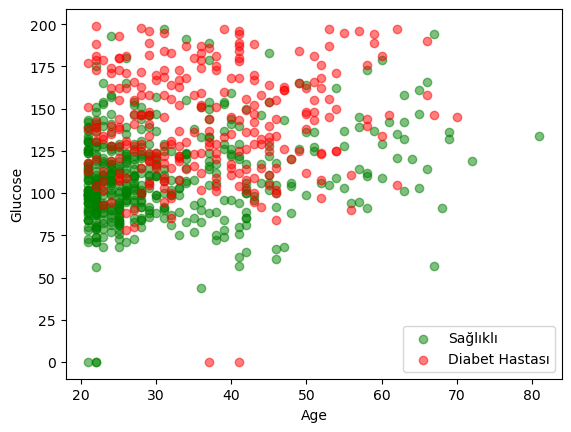

In [7]:
plt.scatter(Hasta_olmayan.Age, Hasta_olmayan.Glucose, color="green", label="Sağlıklı", alpha=0.5)
plt.scatter(Hasta_olan.Age, Hasta_olan.Glucose, color="red", label="Diabet Hastası", alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

In [8]:
y = data.Outcome.values
x = data.drop(['Outcome'], axis=1)

In [10]:
X = (x - np.min(x)) / (np.max(x) - np.min(x))

C:\Users\alpnn\AppData\Local\anaconda3\envs\alp\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\alpnn\AppData\Local\anaconda3\envs\alp\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\alpnn\AppData\Local\anaconda3\envs\alp\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **pass

In [12]:
x.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [13]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 1)

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
knn.score(x_test, y_test)

0.7857142857142857

In [24]:
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(x_train,y_train)
    print(sayac, " ", "Doğruluk Oranı: %", knn_yeni.score(x_test, y_test) * 100)
    sayac += 1

1   Doğruluk Oranı: % 69.48051948051948
2   Doğruluk Oranı: % 74.02597402597402
3   Doğruluk Oranı: % 78.57142857142857
4   Doğruluk Oranı: % 75.97402597402598
5   Doğruluk Oranı: % 79.87012987012987
6   Doğruluk Oranı: % 79.22077922077922
7   Doğruluk Oranı: % 81.16883116883116
8   Doğruluk Oranı: % 79.22077922077922
9   Doğruluk Oranı: % 78.57142857142857
10   Doğruluk Oranı: % 79.22077922077922


In [26]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit_transform(x)

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [28]:
new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

C:\Users\alpnn\AppData\Local\anaconda3\envs\alp\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\alpnn\AppData\Local\anaconda3\envs\alp\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1